In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, precision_score, classification_report, mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r"F:\Projects\customer\customer_feedback_satisfaction.csv")

In [3]:
df.head(5)

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [4]:
df.shape

(38444, 11)

In [5]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['CustomerID'], inplace=True)

In [8]:
df.head(5)

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


### Gender

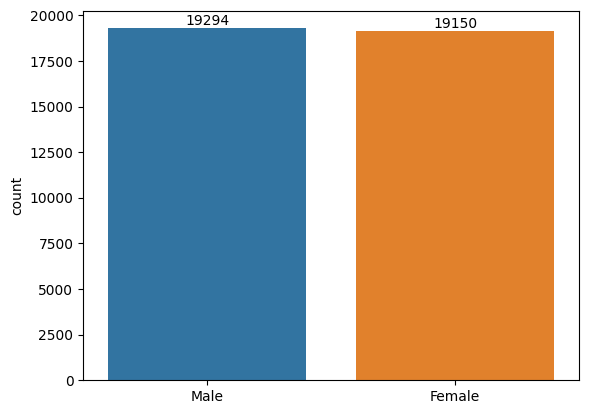

In [9]:
val = df['Gender'].value_counts()
sns.barplot(x = df['Gender'].unique() , y = val, hue=df['Gender'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

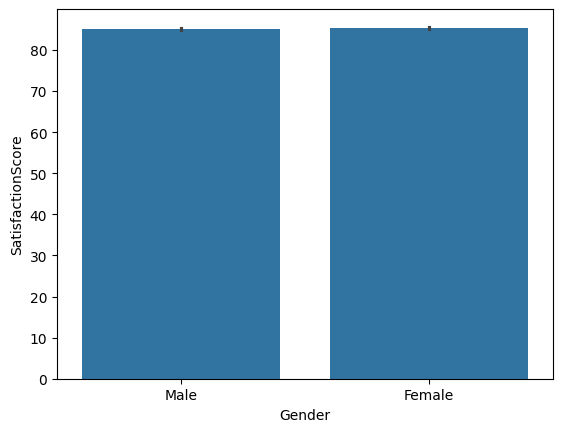

In [10]:
sns.barplot(x=df['Gender'],y=df['SatisfactionScore'])
plt.show()

In [11]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female': 2})

C:\Users\sahil kathiriya\AppData\Local\Temp\ipykernel_16288\3274028157.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male':1, 'Female': 2})


In [12]:
df.head(2)

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,1,UK,83094,5,8,5,Low,Bronze,100.0
1,69,1,UK,86860,10,2,8,Medium,Gold,100.0


### Country

In [13]:
df['Country'].unique()

array(['UK', 'USA', 'France', 'Germany', 'Canada'], dtype=object)

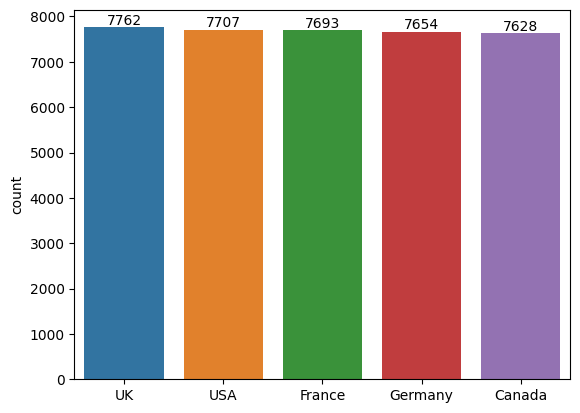

In [14]:
val = df['Country'].value_counts()
sns.barplot(x = df['Country'].unique() , y = val, hue=df['Country'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

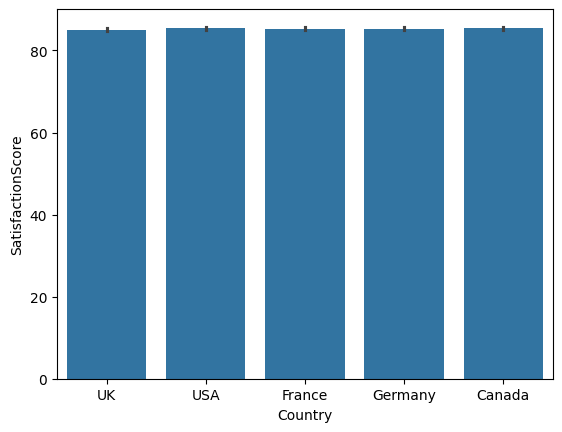

In [15]:
sns.barplot(x=df['Country'],y=df['SatisfactionScore'])
plt.show()

In [16]:
df['Country'] = df['Country'].replace({'UK': 1, 'USA': 2, 'France': 3, 'Germany': 4, 'Canada': 5})

C:\Users\sahil kathiriya\AppData\Local\Temp\ipykernel_16288\3034537288.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country'] = df['Country'].replace({'UK': 1, 'USA': 2, 'France': 3, 'Germany': 4, 'Canada': 5})


In [17]:
df.head(3)

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,1,1,83094,5,8,5,Low,Bronze,100.0
1,69,1,1,86860,10,2,8,Medium,Gold,100.0
2,46,2,2,60173,8,10,18,Medium,Silver,100.0


### ProductQuality

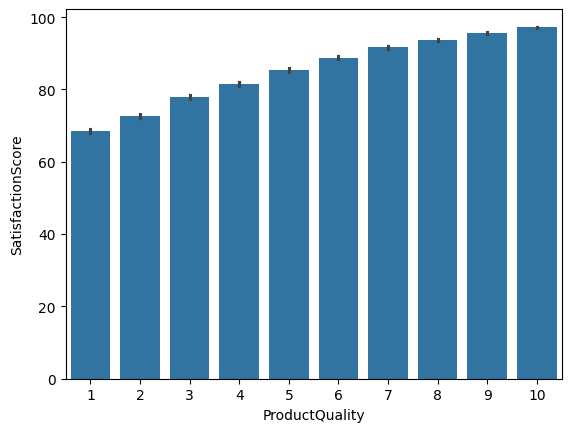

In [18]:
sns.barplot(x=df['ProductQuality'],y=df['SatisfactionScore'])
plt.show()

### ServiceQuality

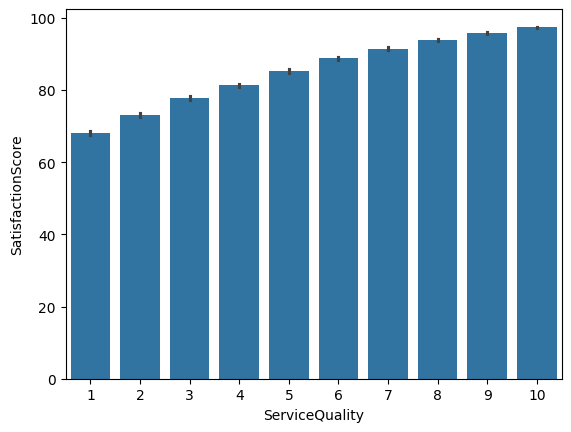

In [19]:
sns.barplot(x=df['ServiceQuality'],y=df['SatisfactionScore'])
plt.show()

### FeedbackScore

In [20]:
df['FeedbackScore'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

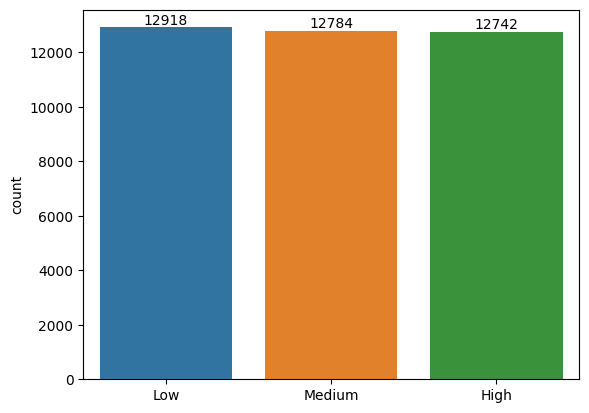

In [21]:
val = df['FeedbackScore'].value_counts()
sns.barplot(x = df['FeedbackScore'].unique() , y = val, hue=df['FeedbackScore'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

In [23]:
df['FeedbackScore'] = df['FeedbackScore'].replace({'Low': 1, 'Medium': 2, 'High': 3})


C:\Users\sahil kathiriya\AppData\Local\Temp\ipykernel_16288\3958293209.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FeedbackScore'] = df['FeedbackScore'].replace({'Low': 1, 'Medium': 2, 'High': 3})


In [24]:
df.head(3)

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,1,1,83094,5,8,5,1,Bronze,100.0
1,69,1,1,86860,10,2,8,2,Gold,100.0
2,46,2,2,60173,8,10,18,2,Silver,100.0


### LoyaltyLevel

In [25]:
df['LoyaltyLevel'].unique()

array(['Bronze', 'Gold', 'Silver'], dtype=object)

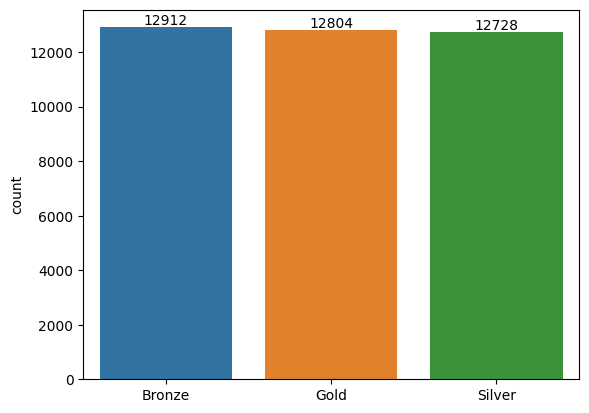

In [26]:
val = df['LoyaltyLevel'].value_counts()
sns.barplot(x = df['LoyaltyLevel'].unique() , y = val, hue=df['LoyaltyLevel'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

In [27]:
df['LoyaltyLevel'] = df['LoyaltyLevel'].replace({'Bronze': 1, 'Gold': 2, 'Silver': 3})


C:\Users\sahil kathiriya\AppData\Local\Temp\ipykernel_16288\428356761.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LoyaltyLevel'] = df['LoyaltyLevel'].replace({'Bronze': 1, 'Gold': 2, 'Silver': 3})


In [28]:
df.head(3)


,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,1,1,83094,5,8,5,1,1,100.0
1,69,1,1,86860,10,2,8,2,2,100.0
2,46,2,2,60173,8,10,18,2,3,100.0


In [32]:
x = df.drop(columns=['SatisfactionScore'])
y = df['SatisfactionScore']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Linear Regression

In [45]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 7.38
mean_squared_error : 84.89
r2_score : 0.70


### Decision Tree

In [48]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth= 9, min_samples_leaf= 10, min_samples_split= 15)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 5.92
mean_squared_error : 72.79
r2_score : 0.74


### Random Forest

In [51]:
model = RandomForestRegressor(n_estimators=150,max_depth= 12, min_samples_leaf= 10, min_samples_split= 8)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 5.51
mean_squared_error : 61.93
r2_score : 0.78


### Gradien Boost


In [53]:
model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth= 6,min_samples_leaf=10,min_samples_split=8)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 5.50
mean_squared_error : 59.91
r2_score : 0.79
